##### 데이터셋 링크 : https://www.kaggle.com/competitions/playground-series-s4e2/data
- 참고자료 : https://www.kaggle.com/code/christina0626/feature-engineering-model-combined
- 참고자료 : https://www.kaggle.com/code/thomasmeiner/ps4e2-eda-feature-engineering-modelling


# 1.Load Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../dataset/240225_Multi-Class Prediction of Obesity Risk/train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
null_counts = df.isnull().sum()
print(null_counts)

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [69]:
import warnings

# 경고 메시지를 무시하도록 설정
warnings.filterwarnings("ignore")

# 코드 실행
# 이후에 발생하는 경고 메시지들은 출력되지 않습니다.

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >, <Axes: >]],
      dtype=object)

findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

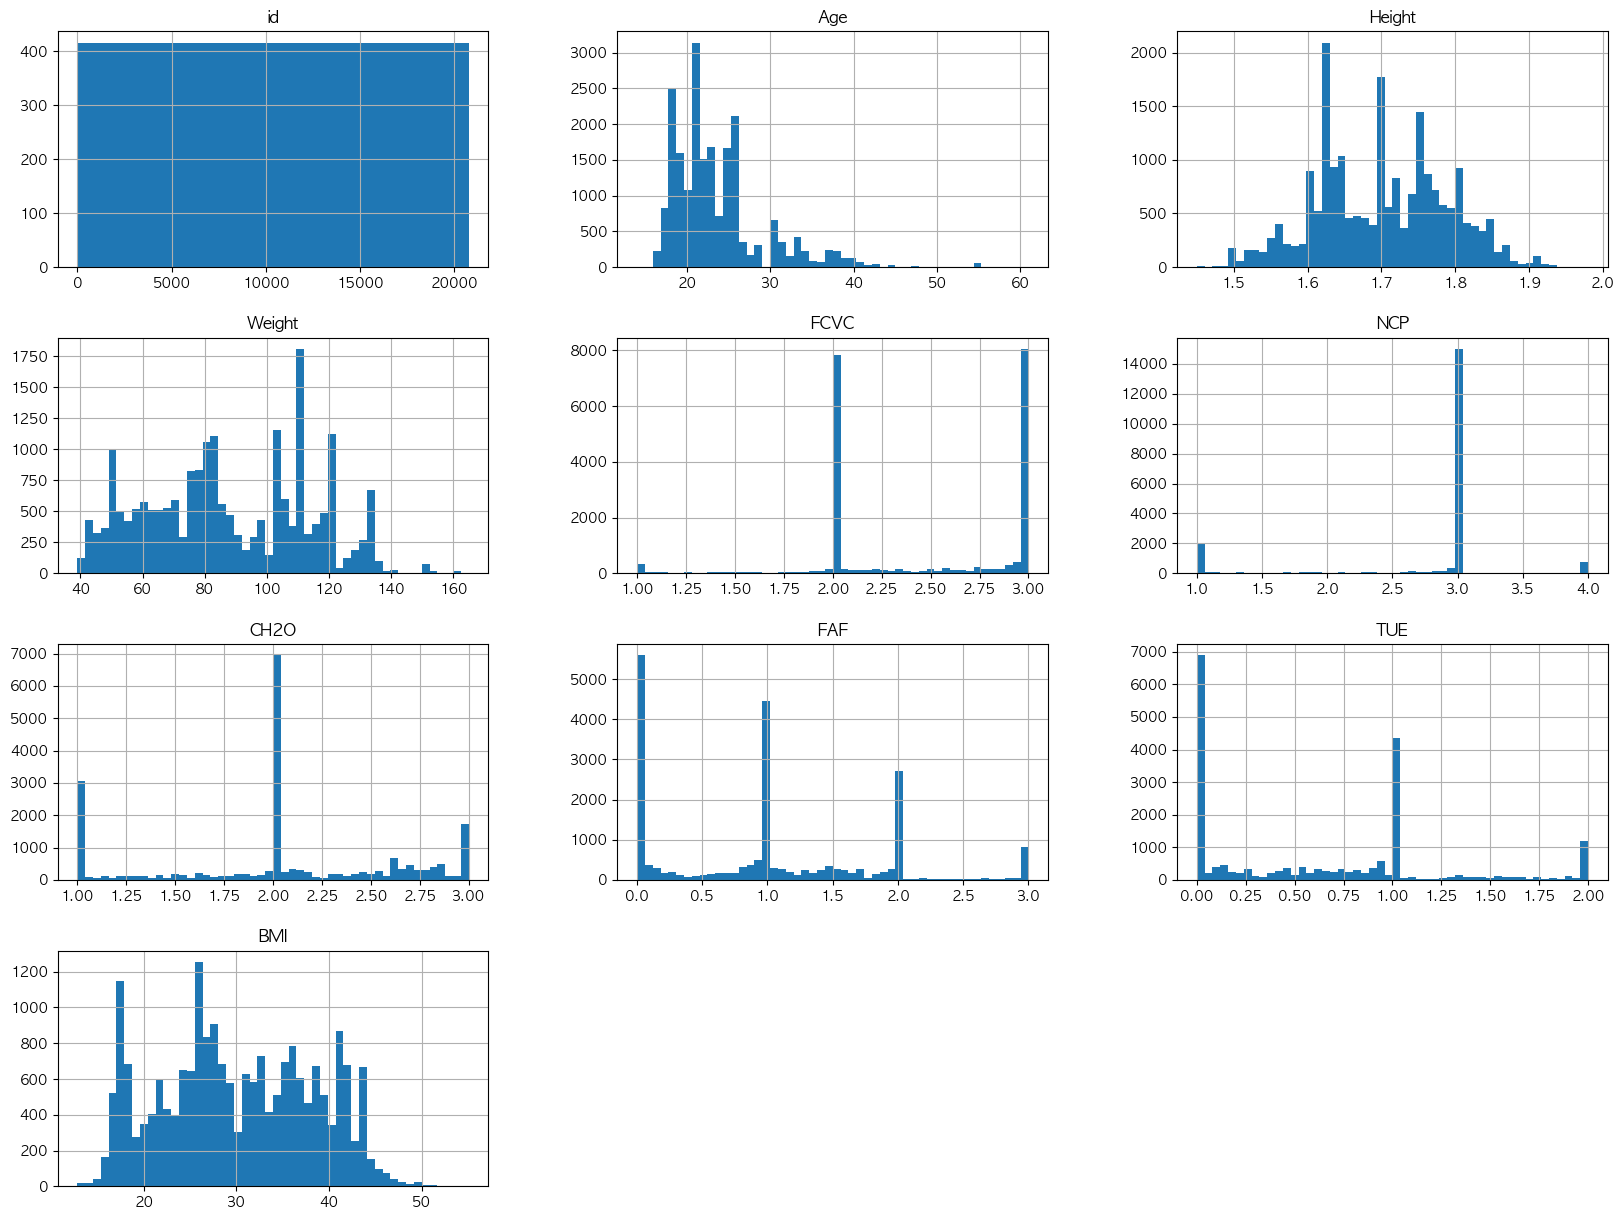

In [70]:
df.hist(bins=50,figsize=(20,15))

In [8]:
df.value_counts()

id     Gender  Age        Height    Weight      family_history_with_overweight  FAVC  FCVC      NCP       CAEC       SMOKE  CH2O      SCC  FAF       TUE       CALC       MTRANS                 NObeyesdad         
0      Male    24.443011  1.699998  81.669950   yes                             yes   2.000000  2.983297  Sometimes  no     2.763573  no   0.000000  0.976473  Sometimes  Public_Transportation  Overweight_Level_II    1
13826  Male    21.012569  1.697421  100.431625  yes                             yes   2.000000  1.627555  Sometimes  no     1.000000  no   1.000000  0.460866  Sometimes  Public_Transportation  Obesity_Type_I         1
13844  Female  16.496978  1.691206  82.000000   yes                             yes   2.668890  1.680838  Sometimes  no     1.876915  no   0.130417  1.796136  Sometimes  Public_Transportation  Obesity_Type_I         1
13843  Female  21.024970  1.735810  131.042274  yes                             yes   3.000000  3.000000  Sometimes  no     1.650612 

In [9]:
df['Age'].value_counts()

Age
18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
23.462915       1
18.065817       1
21.945380       1
16.120699       1
33.852953       1
Name: count, Length: 1703, dtype: int64

# * 각 칼럼에 대한 설명

### **Gender**: 
- categorical variable that shows the biological sex of the individual (male or female).
### **Age**: 
- numerical variable that shows the individual’s age in years.
### **Height**: 
- numerical variable that shows the individuals’ height in meters.
### **Weight**: 
- numerical variable that shows the individuals’ weight in kilograms.
### **Family history of overweight**: 
- categorical variable that shows if the individual has a family member who is overweight or obese (yes or no).
### **FAVC**  고칼로리 음식을 자주 섭취하는가?  -> yes/ no Frequently consumed high-calorie food (FAVC): 
- categorical variable that shows if the individual often eats high-calorie food 
- (yes or no).         
### **FCVC**  야채를 자주 섭취하는가? -> 빈도 Frequency of consumption of vegetables (FCVC): 
- ordinal variable that shows how often the individual eats vegetables 
- (1 = never, 2 = sometimes, 3 = always).
### **NCP** 메인 식사를 하루에 몇번 가지는가? -> 횟수 Number of main meals (NCP): 
 - ordinal variable that shows how many main meals the individual has daily 
 - (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer).                        
### **CAEC**  식사와 식사 사이에 몇번 먹는가? -> 빈도 Consumption of food between meals (CAEC): 
 - ordinal variable that shows how often the individual eats food between meals 
 - (1 = no, 2 = sometimes, 3 = frequently, 4 = always).
 ### **SMOKE**  흡연 유무                        
 ### **CH2O** 물을 얼마나 마시는가? Consumption of water daily (CH2O): 
 - ordinal variable that shows how much water the individual drinks daily 
 - (1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L).                         
 ### **SCC** 칼로리를 확인하는가? -> yes / no Monitor calorie intake (SCC): 
 - categorical variable that shows if the individual keeps track of their caloric intake 
 - (yes or no).
 ### **FAF** 신체활동을 몇 번 하는가? -> 횟수 Frequency of physical activity (FAF): 
 - ordinal variable that shows how often the individual does physical activity 
 - (1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week).                           
 ### **TUE** 전자기기를 몇시간이나 사용하는가? Time using electronic devices (TUE): 
 - ordinal variable that shows how long the individual uses electronic devices 
 - (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours).
 ### **CALC** 술은 얼마나 마시는가? Consumption of alcohol (CALC): 
 - ordinal variable that shows how often the individual drinks alcohol 
 - (1 = no, 2 = sometimes, 3 = frequently, 4 = always).
 ### **MTRANS** 교통수단은 뭘 이용하는가? Type of transportation used (MTRANS): 
 - categorical variable that shows what kind of transportation the individual uses 
 - (automobile, motorbike, bike, public transportation, walking).
 ### **NObeyesdad**#  : 비만유형

# EDA

In [50]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [10]:
df['FAVC'].value_counts()

FAVC
yes    18982
no      1776
Name: count, dtype: int64

In [11]:
df['FCVC'].value_counts()
# (1 = never, 2 = sometimes, 3 = always).

FCVC
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: count, Length: 934, dtype: int64

In [12]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['FCVC'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)


정수로 표시된 값들의 비율: 0.7508430484632431
소수점으로 나와있는 값들의 비율: 0.24915695153675688


In [13]:
df['NCP'].value_counts()
# (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer).  

NCP
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
3.608850        1
1.193486        1
2.737620        1
3.019574        1
2.256119        1
Name: count, Length: 689, dtype: int64

In [14]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['NCP'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)


정수로 표시된 값들의 비율: 0.8386164370363234
소수점으로 나와있는 값들의 비율: 0.16138356296367662


In [15]:
df['CAEC'].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [16]:
df['SMOKE'].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

In [17]:
#(1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L).   
df['CH2O'].value_counts()

CH2O
2.000000    6616
1.000000    2799
3.000000    1571
2.825629      77
2.868167      60
            ... 
2.835195       1
2.632983       1
2.090213       1
2.756916       1
1.365188       1
Name: count, Length: 1506, dtype: int64

In [18]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['CH2O'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)

정수로 표시된 값들의 비율: 0.5292417381250603
소수점으로 나와있는 값들의 비율: 0.47075826187493974


In [19]:
df['SCC'].value_counts()

SCC
no     20071
yes      687
Name: count, dtype: int64

In [20]:
#(1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week).   
df['FAF'].value_counts()

FAF
0.000000    5044
1.000000    4097
2.000000    2391
3.000000     800
1.097905      56
            ... 
1.706287       1
0.675983       1
1.923607       1
1.320209       1
0.988668       1
Name: count, Length: 1360, dtype: int64

In [21]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['FAF'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)

정수로 표시된 값들의 비율: 0.5940842084979285
소수점으로 나와있는 값들의 비율: 0.40591579150207147


In [22]:
# (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours).
df['TUE'].value_counts()

TUE
0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
1.223661       1
0.057868       1
0.236067       1
0.073088       1
0.768375       1
Name: count, Length: 1297, dtype: int64

In [23]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['TUE'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)

정수로 표시된 값들의 비율: 0.5792947297427498
소수점으로 나와있는 값들의 비율: 0.42070527025725024


In [24]:
df['CALC'].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [25]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [26]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

## 상관관계 분석

In [28]:
df['Age'].value_counts()

Age
18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
23.462915       1
18.065817       1
21.945380       1
16.120699       1
33.852953       1
Name: count, Length: 1703, dtype: int64

In [29]:
# Age 열을 소수점 이하 자릿수를 제거하여 정수로 변환
df['Age'] = df['Age'].astype(int)

<Axes: >

findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

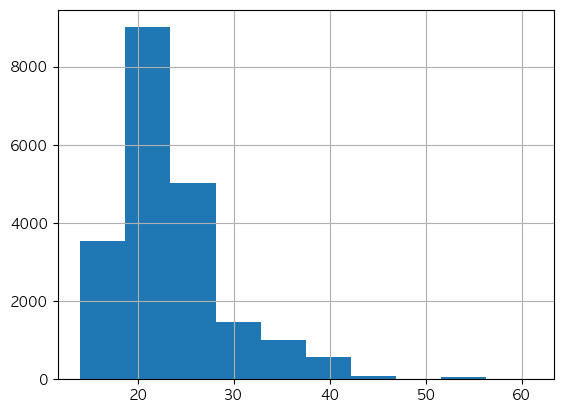

In [31]:
df['Age'].hist()

In [32]:
df.value_counts()

id     Gender  Age  Height    Weight      family_history_with_overweight  FAVC  FCVC      NCP       CAEC       SMOKE  CH2O      SCC  FAF       TUE       CALC       MTRANS                 NObeyesdad         
0      Male    24   1.699998  81.669950   yes                             yes   2.000000  2.983297  Sometimes  no     2.763573  no   0.000000  0.976473  Sometimes  Public_Transportation  Overweight_Level_II    1
13826  Male    21   1.697421  100.431625  yes                             yes   2.000000  1.627555  Sometimes  no     1.000000  no   1.000000  0.460866  Sometimes  Public_Transportation  Obesity_Type_I         1
13844  Female  16   1.691206  82.000000   yes                             yes   2.668890  1.680838  Sometimes  no     1.876915  no   0.130417  1.796136  Sometimes  Public_Transportation  Obesity_Type_I         1
13843  Female  21   1.735810  131.042274  yes                             yes   3.000000  3.000000  Sometimes  no     1.650612  no   1.645532  0.912187  Some

In [33]:
df['Height'].value_counts()

Height
1.700000    1334
1.650000     782
1.600000     672
1.750000     659
1.800000     517
            ... 
1.631456       1
1.753471       1
1.782521       1
1.930416       1
1.536819       1
Name: count, Length: 1833, dtype: int64

In [34]:
df['Height'] = df['Height'].round(2)

In [35]:
df['Height'].value_counts()

Height
1.70    1775
1.75    1445
1.62    1096
1.65    1037
1.63     998
1.64     932
1.60     900
1.76     865
1.72     834
1.77     722
1.80     698
1.74     681
1.78     576
1.71     555
1.79     549
1.61     526
1.67     471
1.68     456
1.66     455
1.85     443
1.82     410
1.56     399
1.69     389
1.83     385
1.73     365
1.84     333
1.55     275
1.81     230
1.57     216
1.59     214
1.87     205
1.58     199
1.50     175
1.53     160
1.52     159
1.54     142
1.86     137
1.91     101
1.88      55
1.51      54
1.90      37
1.89      29
1.92      25
1.93      16
1.48      12
1.49       5
1.98       4
1.94       4
1.95       4
1.46       3
1.45       2
Name: count, dtype: int64

In [36]:
df.value_counts()

id     Gender  Age  Height  Weight      family_history_with_overweight  FAVC  FCVC      NCP       CAEC       SMOKE  CH2O      SCC  FAF       TUE       CALC       MTRANS                 NObeyesdad         
0      Male    24   1.70    81.669950   yes                             yes   2.000000  2.983297  Sometimes  no     2.763573  no   0.000000  0.976473  Sometimes  Public_Transportation  Overweight_Level_II    1
13826  Male    21   1.70    100.431625  yes                             yes   2.000000  1.627555  Sometimes  no     1.000000  no   1.000000  0.460866  Sometimes  Public_Transportation  Obesity_Type_I         1
13844  Female  16   1.69    82.000000   yes                             yes   2.668890  1.680838  Sometimes  no     1.876915  no   0.130417  1.796136  Sometimes  Public_Transportation  Obesity_Type_I         1
13843  Female  21   1.74    131.042274  yes                             yes   3.000000  3.000000  Sometimes  no     1.650612  no   1.645532  0.912187  Sometimes  Pub

In [37]:
df['Weight'] = df['Weight'].astype(int)

In [46]:
df.drop(columns=['BMI'], inplace=True)

In [47]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [41]:
df.value_counts()

id     Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC      NCP       CAEC       SMOKE  CH2O      SCC  FAF       TUE       CALC       MTRANS                 NObeyesdad         
0      Male    24   1.70    81      yes                             yes   2.000000  2.983297  Sometimes  no     2.763573  no   0.000000  0.976473  Sometimes  Public_Transportation  Overweight_Level_II    1
13826  Male    21   1.70    100     yes                             yes   2.000000  1.627555  Sometimes  no     1.000000  no   1.000000  0.460866  Sometimes  Public_Transportation  Obesity_Type_I         1
13844  Female  16   1.69    82      yes                             yes   2.668890  1.680838  Sometimes  no     1.876915  no   0.130417  1.796136  Sometimes  Public_Transportation  Obesity_Type_I         1
13843  Female  21   1.74    131     yes                             yes   3.000000  3.000000  Sometimes  no     1.650612  no   1.645532  0.912187  Sometimes  Public_Transportation  

In [48]:
# BMI를 계산하여 새로운 열로 추가
df['BMI'] = (df['Weight'] / (df['Height'] ** 2)).round(1)

In [49]:
df['BMI'].value_counts()

BMI
41.3    477
43.4    319
27.7    315
41.8    295
29.4    293
       ... 
49.2      1
15.0      1
50.8      1
52.1      1
47.5      1
Name: count, Length: 374, dtype: int64

In [53]:
bmi_18_5 = df[df['BMI'] < 18.5]
print(bmi_18_5['NObeyesdad'].value_counts())

NObeyesdad
Insufficient_Weight    2210
Normal_Weight           158
Overweight_Level_I       12
Obesity_Type_I            3
Obesity_Type_III          1
Name: count, dtype: int64


In [56]:
bmi_18_5 = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9)]
print(bmi_18_5['NObeyesdad'].value_counts())


NObeyesdad
Normal_Weight          2747
Overweight_Level_I      402
Insufficient_Weight     301
Overweight_Level_II      73
Obesity_Type_I            9
Obesity_Type_II           2
Name: count, dtype: int64


In [59]:
bmi_18_5 = df[(df['BMI'] >=25.0) & (df['BMI'] <= 29.9)]
print(bmi_18_5['NObeyesdad'].value_counts())

NObeyesdad
Overweight_Level_II    2201
Overweight_Level_I     1966
Obesity_Type_I          373
Normal_Weight           172
Obesity_Type_II          35
Insufficient_Weight      11
Obesity_Type_III          3
Name: count, dtype: int64


In [58]:
#비교적 고르게 분포되어 있다. 
# 각 비만도별 횟수 계산
obesity_counts = df['NObeyesdad'].value_counts()

# 전체 행의 수 계산
total_samples = len(df)

# 각 비만도별 비율 계산
obesity_ratios = obesity_counts / total_samples

# 결과 출력
print(obesity_ratios)


NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: count, dtype: float64


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  int64  
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  int64  
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [64]:
from scipy.stats import chi2_contingency

# 'Age'와 'NObesity' 간의 관계를 카이제곱 검정으로 분석
crosstab = pd.crosstab(df['SMOKE'], df['NObeyesdad'])
chi2, p, dof, expected = chi2_contingency(crosstab)

# 결과 출력
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)



Chi-square value: 216.3006126923555
p-value: 6.396981747148517e-44
Degrees of freedom: 6
Expected frequencies table:
[[2493.22184218 3045.62414491 2875.65420561 3209.66490028 3998.24636285
  2398.35489932 2492.23364486]
 [  29.77815782   36.37585509   34.34579439   38.33509972   47.75363715
    28.64510068   29.76635514]]


In [66]:
from scipy.stats import chi2_contingency

# 'Age'와 'NObesity' 간의 관계를 카이제곱 검정으로 분석
crosstab = pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad'])
chi2, p, dof, expected = chi2_contingency(crosstab)

# 결과 출력
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)



Chi-square value: 6423.317090815157
p-value: 0.0
Degrees of freedom: 6
Expected frequencies table:
[[ 455.05886887  555.88245496  524.85981308  585.82291165  729.7535408
   437.74390596  454.87850467]
 [2067.94113113 2526.11754504 2385.14018692 2662.17708835 3316.2464592
  1989.25609404 2067.12149533]]


In [68]:
from scipy.stats import chi2_contingency

# 'Age'와 'NObesity' 간의 관계를 카이제곱 검정으로 분석
crosstab = pd.crosstab(df['MTRANS'], df['NObeyesdad'])
chi2, p, dof, expected = chi2_contingency(crosstab)

# 결과 출력
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)



Chi-square value: 2349.082567778232
p-value: 0.0
Degrees of freedom: 24
Expected frequencies table:
[[ 429.5347336   524.70315059  495.42056075  552.96425475  688.82185182
   413.19096252  429.36448598]
 [   3.88939204    4.75113209    4.48598131    5.00703343    6.23720975
     3.74140091    3.88785047]
 [   4.61865305    5.64196936    5.3271028     5.9458522     7.40668658
     4.44291358    4.61682243]
 [2028.1964062  2477.56691396 2339.29906542 2611.01146546 3252.50997206
  1951.02365353 2027.39252336]
 [  56.76081511   69.33683399   65.46728972   73.07139416   91.0242798
    54.60106947   56.73831776]]
